In [1]:
#Imports
import os
import pandas as pd
import tensorflow as tf
from keras import backend as K
import scipy.stats as stats

import sys
sys.path.insert(0, '..')
from utils.modelgenerator import *
from utils.modelhandler import *
from utils.datahandler import *
from utils.attackhandler import *

import logging
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
logging.getLogger('tensorflow').setLevel(logging.ERROR)

### Data

In [2]:
file_path = os.path.join(os.path.normpath(os.path.dirname(os.path.dirname(os.getcwd()))), 'data/3final_data/Final_Energy_dataset.csv')
cwd = os.path.normpath(os.getcwd())

# User indices based on clusters
user_indices = [16, 24] # Cluster 2: [16,24] / Cluster 4: [1, 11, 12, 27] / Cluster 10: [2, 4, 6, 9, 10, 14, 15, 18, 25, 30]

# Data processing parameters
sequence_length = 25
batch_size = 16

# Initialize necessary objects
dh = Datahandler()
m1 = ModelGenerator()
mh = Modelhandler()

# Load and prepare data
print("Loading and preparing data...")
df_array = load_and_prepare_data(file_path, user_indices, columns_filter_prefix="load")

# Split the data into training, validation, and test sets
print("Splitting data into train, validation, and test sets...")
X_train, y_train, X_val, y_val, X_test, y_test = split_data(df_array, sequence_length, batch_size, dh)
X_train_raw = X_train

loss = tf.keras.losses.MeanSquaredError()
metrics=[tf.keras.metrics.RootMeanSquaredError(), tf.keras.metrics.MeanAbsoluteError()]
callbacks = get_callbacks()

Loading and preparing data...
Splitting data into train, validation, and test sets...


### Poisoning Attacks Buildings Distributions

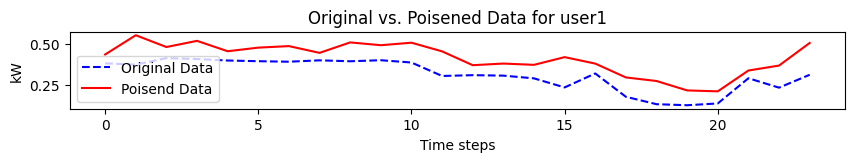

FL: Saved Global models - round  0  (fed_round  0 )
FL: Saved Global models - round  0  (fed_round  1 )
FL: Saved Global models - round  0  (fed_round  2 )
FL: Saved Global models - round  1  (fed_round  0 )
FL: Saved Global models - round  1  (fed_round  1 )
FL: Saved Global models - round  1  (fed_round  2 )
FL: Saved Global models - round  2  (fed_round  0 )
FL: Saved Global models - round  2  (fed_round  1 )
FL: Saved Global models - round  2  (fed_round  2 )
Evaluation: Building:  1  - round  0
Evaluation: Building:  1  - round  1
Evaluation: Building:  1  - round  2
Evaluation: Building:  2  - round  0
Evaluation: Building:  2  - round  1
Evaluation: Building:  2  - round  2
Dictionaries saved successfully!


In [3]:
#Buildings DISTRIBUTION - Scale 0.2
attack = "FL_Load_POISON_BuildD02"
X_train = X_train_raw.copy()

johnsonsu_distribution = stats.johnsonsu(a=stats.skew(X_train["user1"]), b=stats.kurtosis(X_train["user1"]), loc=np.mean(X_train["user1"]), scale=0.2)
X_train["user1"] = X_train["user1"] + johnsonsu_distribution.rvs(size=X_train["user1"].shape)

plot_impact_of_attack_noise(X_train_raw, X_train, user="user1")

#Run Tests
run_federated_training(df_array, X_train, y_train, X_val, y_val, X_test, y_test, callbacks, m1, mh, attack, cwd, loss, metrics)
aggregated_results, all_results = run_federated_local_evaluation(df_array, X_train, y_train, X_val, y_val, X_test, y_test, callbacks, m1, mh, attack, cwd, loss, metrics)

save_dictionaries([
    (f"{attack}_aggregated_results", aggregated_results), 
    (f"{attack}_all_results", all_results)], folder_name="results/")

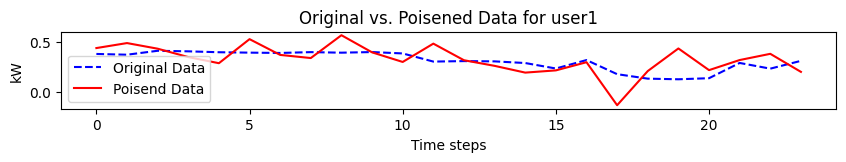

FL: Saved Global models - round  0  (fed_round  0 )
FL: Saved Global models - round  0  (fed_round  1 )
FL: Saved Global models - round  0  (fed_round  2 )
FL: Saved Global models - round  1  (fed_round  0 )
FL: Saved Global models - round  1  (fed_round  1 )
FL: Saved Global models - round  1  (fed_round  2 )
FL: Saved Global models - round  2  (fed_round  0 )
FL: Saved Global models - round  2  (fed_round  1 )
FL: Saved Global models - round  2  (fed_round  2 )
Evaluation: Building:  1  - round  0
Evaluation: Building:  1  - round  1
Evaluation: Building:  1  - round  2
Evaluation: Building:  2  - round  0
Evaluation: Building:  2  - round  1
Evaluation: Building:  2  - round  2
Dictionaries saved successfully!


In [4]:
#Buildings DISTRIBUTION - Scale 0.4
attack = "FL_Load_POISON_BuildD04"
X_train = X_train_raw.copy()

johnsonsu_distribution = stats.johnsonsu(a=stats.skew(X_train["user1"]), b=stats.kurtosis(X_train["user1"]), loc=np.mean(X_train["user1"]), scale=0.4)
X_train["user1"] = X_train["user1"] + johnsonsu_distribution.rvs(size=X_train["user1"].shape)

plot_impact_of_attack_noise(X_train_raw, X_train, user="user1")

#Run Tests
run_federated_training(df_array, X_train, y_train, X_val, y_val, X_test, y_test, callbacks, m1, mh, attack, cwd, loss, metrics)
aggregated_results, all_results = run_federated_local_evaluation(df_array, X_train, y_train, X_val, y_val, X_test, y_test, callbacks, m1, mh, attack, cwd, loss, metrics)

save_dictionaries([
    (f"{attack}_aggregated_results", aggregated_results), 
    (f"{attack}_all_results", all_results)], folder_name="results/")

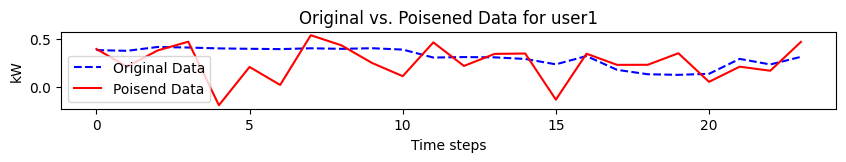

FL: Saved Global models - round  0  (fed_round  0 )
FL: Saved Global models - round  0  (fed_round  1 )
FL: Saved Global models - round  0  (fed_round  2 )
FL: Saved Global models - round  1  (fed_round  0 )
FL: Saved Global models - round  1  (fed_round  1 )
FL: Saved Global models - round  1  (fed_round  2 )
FL: Saved Global models - round  2  (fed_round  0 )
FL: Saved Global models - round  2  (fed_round  1 )
FL: Saved Global models - round  2  (fed_round  2 )
Evaluation: Building:  1  - round  0
Evaluation: Building:  1  - round  1
Evaluation: Building:  1  - round  2
Evaluation: Building:  2  - round  0
Evaluation: Building:  2  - round  1
Evaluation: Building:  2  - round  2
Dictionaries saved successfully!


In [5]:
#Buildings DISTRIBUTION - Scale 0.6
attack = "FL_Load_POISON_BuildD06"
X_train = X_train_raw.copy()

johnsonsu_distribution = stats.johnsonsu(a=stats.skew(X_train["user1"]), b=stats.kurtosis(X_train["user1"]), loc=np.mean(X_train["user1"]), scale=0.6)
X_train["user1"] = X_train["user1"] + johnsonsu_distribution.rvs(size=X_train["user1"].shape)

plot_impact_of_attack_noise(X_train_raw, X_train, user="user1")

#Run Tests
run_federated_training(df_array, X_train, y_train, X_val, y_val, X_test, y_test, callbacks, m1, mh, attack, cwd, loss, metrics)
aggregated_results, all_results = run_federated_local_evaluation(df_array, X_train, y_train, X_val, y_val, X_test, y_test, callbacks, m1, mh, attack, cwd, loss, metrics)

save_dictionaries([
    (f"{attack}_aggregated_results", aggregated_results), 
    (f"{attack}_all_results", all_results)], folder_name="results/")

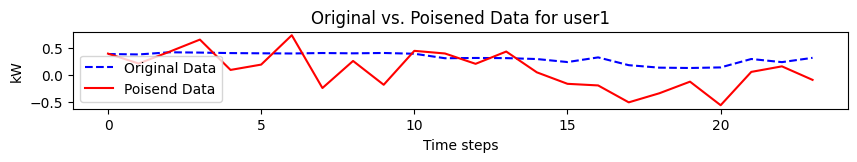

FL: Saved Global models - round  0  (fed_round  0 )
FL: Saved Global models - round  0  (fed_round  1 )
FL: Saved Global models - round  0  (fed_round  2 )
FL: Saved Global models - round  1  (fed_round  0 )
FL: Saved Global models - round  1  (fed_round  1 )
FL: Saved Global models - round  1  (fed_round  2 )
FL: Saved Global models - round  2  (fed_round  0 )
FL: Saved Global models - round  2  (fed_round  1 )
FL: Saved Global models - round  2  (fed_round  2 )
Evaluation: Building:  1  - round  0
Evaluation: Building:  1  - round  1
Evaluation: Building:  1  - round  2
Evaluation: Building:  2  - round  0
Evaluation: Building:  2  - round  1
Evaluation: Building:  2  - round  2
Dictionaries saved successfully!


In [6]:
#Buildings DISTRIBUTION - Scale 0.8
attack = "FL_Load_POISON_BuildD08"
X_train = X_train_raw.copy()

johnsonsu_distribution = stats.johnsonsu(a=stats.skew(X_train["user1"]), b=stats.kurtosis(X_train["user1"]), loc=np.mean(X_train["user1"]), scale=0.8)
X_train["user1"] = X_train["user1"] + johnsonsu_distribution.rvs(size=X_train["user1"].shape)

plot_impact_of_attack_noise(X_train_raw, X_train, user="user1")

#Run Tests
run_federated_training(df_array, X_train, y_train, X_val, y_val, X_test, y_test, callbacks, m1, mh, attack, cwd, loss, metrics)
aggregated_results, all_results = run_federated_local_evaluation(df_array, X_train, y_train, X_val, y_val, X_test, y_test, callbacks, m1, mh, attack, cwd, loss, metrics)

save_dictionaries([
    (f"{attack}_aggregated_results", aggregated_results), 
    (f"{attack}_all_results", all_results)], folder_name="results/")

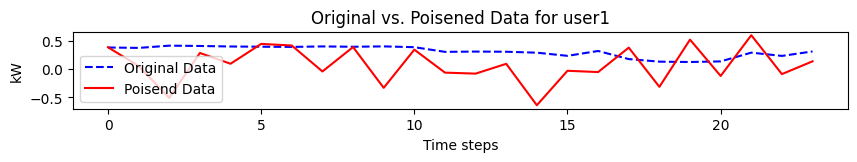

FL: Saved Global models - round  0  (fed_round  0 )
FL: Saved Global models - round  0  (fed_round  1 )
FL: Saved Global models - round  0  (fed_round  2 )
FL: Saved Global models - round  1  (fed_round  0 )
FL: Saved Global models - round  1  (fed_round  1 )
FL: Saved Global models - round  1  (fed_round  2 )
FL: Saved Global models - round  2  (fed_round  0 )
FL: Saved Global models - round  2  (fed_round  1 )
FL: Saved Global models - round  2  (fed_round  2 )
Evaluation: Building:  1  - round  0
Evaluation: Building:  1  - round  1
Evaluation: Building:  1  - round  2
Evaluation: Building:  2  - round  0
Evaluation: Building:  2  - round  1
Evaluation: Building:  2  - round  2
Dictionaries saved successfully!


In [7]:
#Buildings DISTRIBUTION - Scale 1
attack = "FL_Load_POISON_BuildD1"
X_train = X_train_raw.copy()

johnsonsu_distribution = stats.johnsonsu(a=stats.skew(X_train["user1"]), b=stats.kurtosis(X_train["user1"]), loc=np.mean(X_train["user1"]), scale=1.0)
X_train["user1"] = X_train["user1"] + johnsonsu_distribution.rvs(size=X_train["user1"].shape)

plot_impact_of_attack_noise(X_train_raw, X_train, user="user1")

#Run Tests
run_federated_training(df_array, X_train, y_train, X_val, y_val, X_test, y_test, callbacks, m1, mh, attack, cwd, loss, metrics)
aggregated_results, all_results = run_federated_local_evaluation(df_array, X_train, y_train, X_val, y_val, X_test, y_test, callbacks, m1, mh, attack, cwd, loss, metrics)

save_dictionaries([
    (f"{attack}_aggregated_results", aggregated_results), 
    (f"{attack}_all_results", all_results)], folder_name="results/")

In [8]:
import requests
import os

def send_telegram_message(bot_token, chat_id, message):
    """Send a message to a Telegram chat via the Bot API."""
    url = f"https://api.telegram.org/bot{bot_token}/sendMessage"
    payload = {
        "chat_id": chat_id,
        "text": message,
        "parse_mode": "Markdown"
    }
    response = requests.post(url, json=payload)
    return response.json()

# Use the function
bot_token = os.getenv('TELEGRAM_BOT_TOKEN')
chat_id = os.getenv('TELEGRAM_CHAT_ID')
message = f"Script .81!"

result = send_telegram_message(bot_token, chat_id, message)
print(result)

{'ok': True, 'result': {'message_id': 284, 'from': {'id': 7071194232, 'is_bot': True, 'first_name': 'Reinforcement Learning', 'username': 'FederatedRL_Bot'}, 'chat': {'id': 5493937056, 'first_name': 'Jonas', 'last_name': 'Sievers', 'username': 'JonasSievers', 'type': 'private'}, 'date': 1723893500, 'text': 'Script .81!'}}
